In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Applying all mechanisms to 1 dimension

Text(0.5, 1.0, 'Pdf of distributions w/ Mean: 0 Scale: 1')

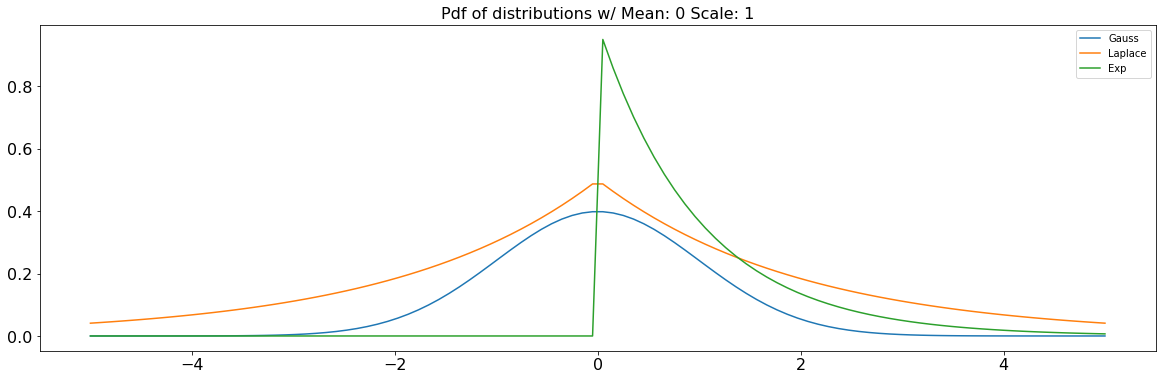

In [21]:
# Cts valued distributions
k = -5
scale = 1
mu = 0 
x = np.linspace(-k, k, 100)

gauss = lambda x : 1/(scale*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*scale**2))
laplace = lambda x : 1/(2*scale)*np.exp(-abs(x - mu)/(2*scale))

def exponential(_x, _mu):
    
    if _x <= 0:
        return 0
    
    return _mu*np.exp(-_mu*_x)
    

df = pd.DataFrame([[gauss(i) for i in x],
                   [laplace(i) for i in x],
                   [exponential(i, mu+1) for i in x],
                  ],
             columns=x, index=['Gauss', 'Laplace', 'Exp'])

ax = df.T.plot(figsize=(20, 6), fontsize=16)
ax.set_title('Pdf of distributions w/ Mean: {} Scale: {}'.format(mu, scale), fontsize=16)

In [19]:
df.loc['Exp']

 5.00000    [9.079985952496971e-05, 0.00011112747219318698...
 4.89899    [9.079985952496971e-05, 0.00011112747219318698...
 4.79798    [9.079985952496971e-05, 0.00011112747219318698...
 4.69697    [9.079985952496971e-05, 0.00011112747219318698...
 4.59596    [9.079985952496971e-05, 0.00011112747219318698...
                                  ...                        
-4.59596                                                  0.0
-4.69697                                                  0.0
-4.79798                                                  0.0
-4.89899                                                  0.0
-5.00000                                                  0.0
Name: Exp, Length: 100, dtype: object

For pure differential privacy it we need the tails to decay at the rate of laplace or slower. Similarly for discrete distributions, we need the tails to decay slower than the discret laplace distribution. 

In [ ]:
# Discrete distributions:

* Binomial
* Poisson
* Negative Binomial
* Geometric Distribution
* Symmetric Geometric distribution.

In [ ]:
def laplace_mechanism(oracle_output, epsilon, sensitivity):

    scale = sensitivity/epsilon
    
    if isinstance(oracle_output, np.int64) or isinstance(oracle_output, np.float64):
        return oracle_output +  np.random.laplace(loc=0.0, scale=scale, size=None)
    
    z = np.zeros(len(oracle_output))
    for i in range(len(oracle_output)):
        z[i] = oracle_output[i] + np.random.laplace(loc=0.0, scale=scale, size=None)
        
    return z 
